In [11]:
import pandas as pd
import numpy as np
import seaborn as sns                # visualization
import matplotlib.pyplot as plt     # for visualization
from sklearn.preprocessing import LabelEncoder   # for encoding variables
import datetime

import warnings
warnings.filterwarnings('ignore')

In [12]:
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Train.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Test.csv")
riders = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Riders.csv")

In [13]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [14]:
# check the size of the train and test data
train.shape

(21201, 29)

In [15]:
test.shape

(7068, 25)

In [16]:
# check if there's any missing values
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [17]:
test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [18]:
# show percentage of missing values for both train and test set

percent_missing = train.isnull().sum()/len(train)*100
percent_missing

Order No                                      0.000000
User Id                                       0.000000
Vehicle Type                                  0.000000
Platform Type                                 0.000000
Personal or Business                          0.000000
Placement - Day of Month                      0.000000
Placement - Weekday (Mo = 1)                  0.000000
Placement - Time                              0.000000
Confirmation - Day of Month                   0.000000
Confirmation - Weekday (Mo = 1)               0.000000
Confirmation - Time                           0.000000
Arrival at Pickup - Day of Month              0.000000
Arrival at Pickup - Weekday (Mo = 1)          0.000000
Arrival at Pickup - Time                      0.000000
Pickup - Day of Month                         0.000000
Pickup - Weekday (Mo = 1)                     0.000000
Pickup - Time                                 0.000000
Arrival at Destination - Day of Month         0.000000
Arrival at

In [19]:
percent_missing_2 = test.isnull().sum()/len(test)*100
percent_missing_2

Order No                                 0.000000
User Id                                  0.000000
Vehicle Type                             0.000000
Platform Type                            0.000000
Personal or Business                     0.000000
Placement - Day of Month                 0.000000
Placement - Weekday (Mo = 1)             0.000000
Placement - Time                         0.000000
Confirmation - Day of Month              0.000000
Confirmation - Weekday (Mo = 1)          0.000000
Confirmation - Time                      0.000000
Arrival at Pickup - Day of Month         0.000000
Arrival at Pickup - Weekday (Mo = 1)     0.000000
Arrival at Pickup - Time                 0.000000
Pickup - Day of Month                    0.000000
Pickup - Weekday (Mo = 1)                0.000000
Pickup - Time                            0.000000
Distance (KM)                            0.000000
Temperature                             20.331070
Precipitation in millimeters            97.184493


In [20]:
# we can see that the column "Precipitation in millimeters " contains is missing 97% of the data
# We might consider dropping this column in both train and test set

train = train.drop(columns='Precipitation in millimeters')

In [21]:
test = test.drop(columns='Precipitation in millimeters')

In [22]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [23]:
def time_from_midnight_in_seconds(column):
    train[column] = pd.to_datetime(train[column])
    return (train[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')


def delta_time(dataset, higher_time, lower_time):
    return dataset[higher_time] - dataset[lower_time]


def average(list_data):
    return sum(list_data)/len(list_data)+1


def time_to_day_part(time):
    hours = time/3600
    if hours < 6:
        return 'night'
    if hours < 12:
        return 'morning'
    if hours < 18:
        return 'afternoon'
    else:
        return 'evening'

In [24]:
def calculate_bearing(lat1, lng1, lat2, lng2):
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)
    diffLong = np.deg2rad(lng2 - lng1)
    x = np.sin(diffLong) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1)
                                       * np.cos(lat2) * np.cos(diffLong))
    initial_bearing = np.arctan2(x, y)
    
    initial_bearing = np.rad2deg(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360
    return compass_bearing

In [25]:
# Now we convert the time in seconds from midnight for the train data

train['Placement - Time'] = time_from_midnight_in_seconds('Placement - Time')
train['Confirmation - Time'] = time_from_midnight_in_seconds('Confirmation - Time')
train['Pickup - Time'] = time_from_midnight_in_seconds('Pickup - Time')
train['Arrival at Pickup - Time'] = time_from_midnight_in_seconds('Arrival at Pickup - Time')
train['Arrival at Destination - Time'] = time_from_midnight_in_seconds('Arrival at Destination - Time')


In [26]:
# Now we convert the time in seconds from midnight for the test data

test['Placement - Time'] = time_from_midnight_in_seconds('Placement - Time')
test['Confirmation - Time'] = time_from_midnight_in_seconds('Confirmation - Time')
test['Pickup - Time'] = time_from_midnight_in_seconds('Pickup - Time')
test['Arrival at Pickup - Time'] = time_from_midnight_in_seconds('Arrival at Pickup - Time')

In [27]:
# Calculate delta for train data. e.g (difference between time order was placed and time order was confirmed by rider)

delta_confirm_place_train = delta_time(train, 'Confirmation - Time', 'Placement - Time')
delta_pick_arr_confirm_train = delta_time(train, 'Arrival at Pickup - Time', 'Confirmation - Time')
delta_pickup_confirm_train = delta_time(train, 'Pickup - Time', 'Arrival at Pickup - Time')

In [28]:
# Calculate delta for test set data. 

delta_confirm_place_test = delta_time(test, 'Confirmation - Time', 'Placement - Time')
delta_pick_arr_confirm_test = delta_time(test, 'Arrival at Pickup - Time', 'Confirmation - Time')
delta_pickup_confirm_test = delta_time(test, 'Pickup - Time', 'Arrival at Pickup - Time')

In [29]:
# now let's merge Riders dataset with train and test dataset

train_rider = train.merge(riders,on='Rider Id')
test_rider = test.merge(riders,on='Rider Id')

In [30]:
# drop outliers
train_rider = train_rider[train_rider['Placement - Weekday (Mo = 1)'] == train_rider['Confirmation - Weekday (Mo = 1)']]
train_rider = train_rider[train_rider['Placement - Day of Month'] == train_rider['Confirmation - Day of Month']]


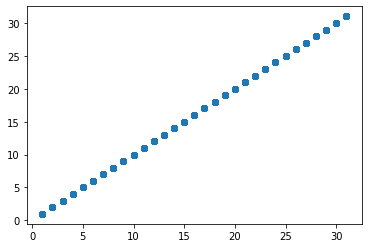

In [31]:
plt.scatter(train_rider['Placement - Day of Month'], train_rider['Confirmation - Day of Month'])

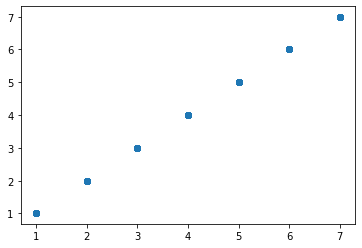

In [32]:
plt.scatter(train_rider['Placement - Weekday (Mo = 1)'], train_rider['Confirmation - Weekday (Mo = 1)'])

In [33]:
# Two scatterplots above show that there are no outliers anymore

In [34]:
# We've observed that the Temparature column contains missing values, faily acceptable amount of missing values(20%)
# instead of dropping it we can impute the missing values with mean/ average tempature for train and test data

train_rider['Temperature'].fillna(train_rider['Temperature'].mean(),inplace = True)
test_rider['Temperature'].fillna(test_rider['Temperature'].mean(),inplace = True)

In [35]:
# Label encoding of Personal or Business column for train data

le = LabelEncoder()
train_rider['Personal or Business'] = le.fit_transform(train_rider['Personal or Business'])

In [36]:
# Label encoding of Personal or Business column for test data

le = LabelEncoder()
test_rider['Personal or Business'] = le.fit_transform(test_rider['Personal or Business'])

In [37]:
# Now, one hot encoding for Plartform type for train data

train_rider['Platform Type'] = train_rider['Platform Type'].astype('category')
train_rider = pd.concat([train_rider.drop(columns=['Platform Type']), pd.get_dummies(train_rider['Platform Type'])], axis=1)


In [38]:
# one hot encoding for Plartform type for test data

test_rider['Platform Type'] = test_rider['Platform Type'].astype('category')
test_rider = pd.concat([test_rider.drop(columns=['Platform Type']), pd.get_dummies(test_rider['Platform Type'])], axis=1)


In [39]:
# drop redundant columns train data
train_rider.drop(columns=['Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)','Placement - Time',
                                    'Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)',
                                    'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Confirmation - Time',
                                    'Arrival at Destination - Day of Month','Arrival at Pickup - Time',
                                    'Arrival at Destination - Weekday (Mo = 1)',
                                    'Vehicle Type', 'Order No','Pickup - Time',
                                    'User Id', 'Rider Id',
                                    ], inplace=True)

In [40]:
test_rider.head()

,Order No,User Id,Vehicle Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,1,2,3,4
0,Order_No_19248,User_Id_3355,Bike,0,27,3,-1.589933e+09,27,3,-1.589933e+09,...,36.822390,Rider_Id_192,439,1511,13.3,171,0,0,1,0
1,Order_No_2699,User_Id_592,Bike,1,26,2,-1.589933e+09,26,2,-1.589933e+09,...,36.760677,Rider_Id_192,439,1511,13.3,171,1,0,0,0
2,Order_No_21486,User_Id_478,Bike,0,29,5,-1.589933e+09,29,5,-1.589933e+09,...,36.790237,Rider_Id_192,439,1511,13.3,171,0,0,1,0
3,Order_No_19336,User_Id_2801,Bike,0,2,1,-1.589933e+09,2,1,-1.589933e+09,...,36.787118,Rider_Id_192,439,1511,13.3,171,0,0,1,0
4,Order_No_20374,User_Id_3465,Bike,0,14,4,-1.589933e+09,14,4,-1.589933e+09,...,36.782203,Rider_Id_192,439,1511,13.3,171,0,0,1,0


In [41]:
train_rider.head()

,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,1,2,3,4
0,0,9,5,38395.0,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,0,0,1,0
1,1,18,5,61303.0,20,24.5,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549,0,0,1,0
2,0,31,5,51403.0,6,24.7,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549,0,0,1,0
3,1,2,2,30512.0,18,15.2,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549,0,0,1,0
4,1,22,2,41182.0,7,19.2,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549,0,1,0,0


In [42]:
# drop redundant columns test data
test_rider.drop(columns=['Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)','Placement - Time',
                                   'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)',
                                   'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
                                   'Vehicle Type','Pickup - Time','Confirmation - Time',
                                   'User Id', 'Rider Id'
                                   ], inplace=True)


In [43]:
test_rider.shape

(7068, 19)

In [44]:
# let's rename columns Platform type and placement

train_rider.rename(columns={1: "Platform Type 1", 2: "Platform Type 2",
                                      3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)

test_rider.rename(columns={1: "Platform Type 1", 2: "Platform Type 2",
                                     3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)

#-------------------------------------Placement---------------------------------------

train_rider.rename(columns={'Placement - Day of Month': 'Day of Month',
                                      'Placement - Weekday (Mo = 1)': 'Weekday (Mo = 1)'})

test_rider.rename(columns={'Placement - Day of Month': 'Day of Month',
                                     'Placement - Weekday (Mo = 1)': 'Weekday (Mo = 1)'})

,Order No,Personal or Business,Day of Month,Weekday (Mo = 1),Arrival at Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform Type 1,Platform Type 2,Platform Type 3,Platform Type 4
0,Order_No_19248,0,27,3,-1.589933e+09,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171,0,0,1,0
1,Order_No_2699,1,26,2,-1.589933e+09,19,23.24612,-1.312745,36.875715,-1.288435,36.760677,439,1511,13.3,171,1,0,0,0
2,Order_No_21486,0,29,5,-1.589933e+09,9,19.70000,-1.255189,36.782203,-1.293393,36.790237,439,1511,13.3,171,0,0,1,0
3,Order_No_19336,0,2,1,-1.589933e+09,15,16.40000,-1.310451,36.868724,-1.259542,36.787118,439,1511,13.3,171,0,0,1,0
4,Order_No_20374,0,14,4,-1.589933e+09,15,21.30000,-1.333275,36.870815,-1.255189,36.782203,439,1511,13.3,171,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_5207,0,8,5,-1.589933e+09,8,27.10000,-1.300921,36.828195,-1.272807,36.796236,2849,2506,14.2,427,0,0,1,0
7064,Order_No_11108,0,9,3,-1.589933e+09,24,25.10000,-1.316959,36.700003,-1.276574,36.851365,3504,2234,14.6,1086,0,0,1,0
7065,Order_No_15696,0,31,5,-1.589933e+09,11,24.90000,-1.303596,36.778378,-1.330611,36.848052,417,136,12.8,34,0,0,1,0
7066,Order_No_14332,0,11,1,-1.589933e+09,19,20.90000,-1.300921,36.828195,-1.319862,36.711032,34,291,15.0,5,0,0,1,0


In [45]:
# Finally pur data is clean and ready for Machile LEARNING model. First let's split the data

X = train_rider.drop(columns='Time from Pickup to Arrival')
y = train_rider['Time from Pickup to Arrival']

In [2]:
# Machine Learning Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#split data
from sklearn.model_selection import train_test_split

In [65]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Split data...also use random state for selecting records randomly

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [3]:
# Fit the mosels now on training data

# Random Forest
rf = RandomForestRegressor(n_estimators=180, max_depth=110,max_features=3, min_samples_leaf=3,min_samples_split=8,
                           random_state=0)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

NameError: name 'X_train' is not defined

In [53]:
final_predict = rf.predict(test_rider.drop(columns='Order No'))
test_rider['Time from Pickup to Arrival'] = final_predict

submission = test_rider[['Order No','Time from Pickup to Arrival' ]]
submission['Time from Pickup to Arrival'] = submission['Time from Pickup to Arrival'].astype(int)
submission.to_csv('C:/Users/mncedisi.mncwabe/Documents/Practices/Siya_Submission.csv', index=False)